### Data Explore

In [1]:
import pandas as pd

# load dataset
df = pd.read_csv('bank_loan_traindata.csv')
df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [2]:
df.tail()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1
6999,7000,31,1.0,Aadhar,705108,900660,0,0,0,0


In [3]:
df.shape

(7000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [5]:
df.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [6]:
df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [7]:
df.nunique()

loan_id             7000
age                   30
education              2
proof_submitted        5
loan_amount         2655
asset_cost          5480
no_of_loans           57
no_of_curr_loans      21
last_delinq_none       2
loan_default           2
dtype: int64

In [8]:
df['education'].value_counts()

education
2.0    3796
1.0    2959
Name: count, dtype: int64

In [9]:
df['proof_submitted'].value_counts()

proof_submitted
Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: count, dtype: int64

In [10]:
df['last_delinq_none'].value_counts()

last_delinq_none
0    6907
1      93
Name: count, dtype: int64

In [11]:
df['loan_default'].value_counts()

loan_default
0    4200
1    2800
Name: count, dtype: int64

In [14]:
df.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

### Data Preprocess

In [17]:
# drop loan id column
df = df.drop(columns=['loan_id'])

In [18]:
# keep a copy for eda used later
df_eduNotClean = df.copy()

In [19]:
# drop missing values 
# had tried repalcing with mean or median or mode or even knnimputer, but accuracy is way more lower
df.dropna(subset=['education'], inplace=True)

In [20]:
# apply one-hot encoding
df = pd.get_dummies(df, columns=['proof_submitted'], prefix='proof')

# change to integer
df = df.astype(int)

In [21]:
df.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_Aadhar,proof_Driving,proof_PAN,proof_Passport,proof_VoterID
0,27,1,504264,820920,2,2,0,0,1,0,0,0,0
1,48,1,728556,831444,6,2,0,0,1,0,0,0,0
2,30,2,642936,826092,0,0,0,1,0,0,0,0,1
3,28,1,746556,930924,0,0,0,0,1,0,0,0,0
4,29,1,1139880,1902000,0,0,0,0,1,0,0,0,0


Skewness before transformation:
loan_amount    0.792617
asset_cost     2.337817
dtype: float64

Skewness after transformation:
loan_amount_log   -0.563871
asset_cost_log     1.201437
dtype: float64


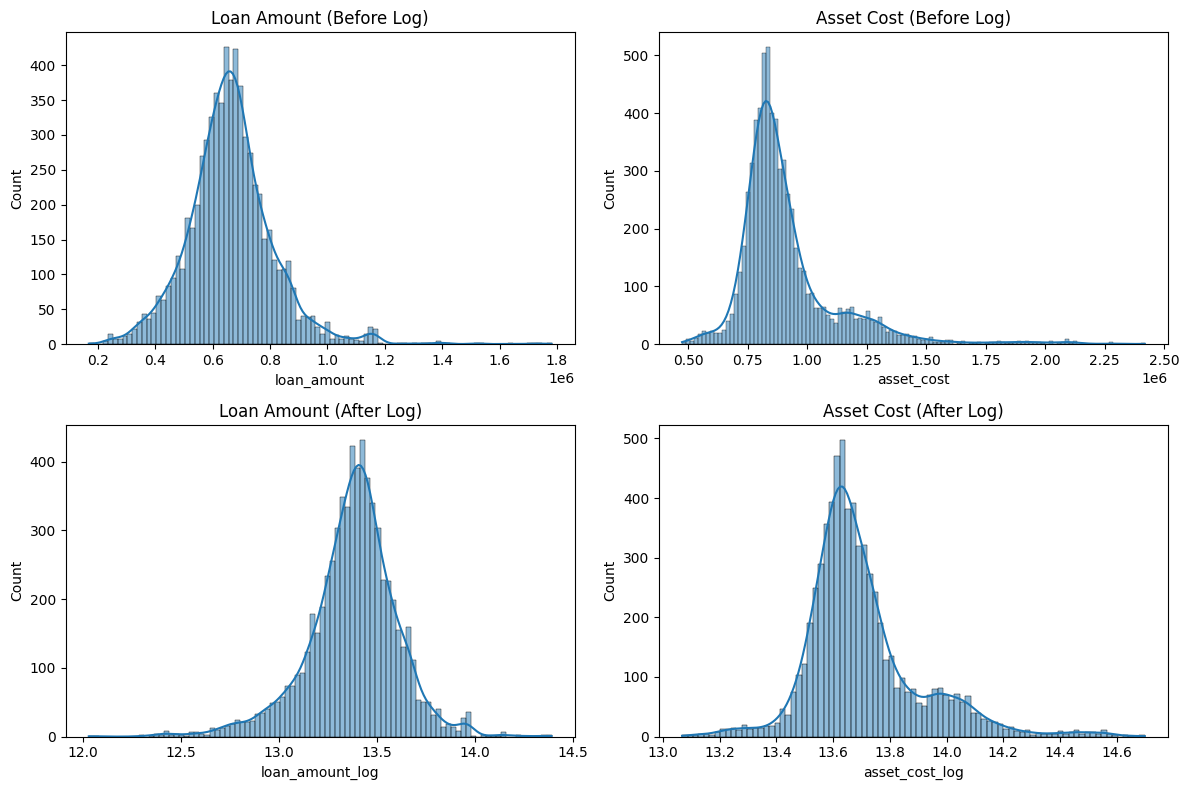

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# most values are small, but a few are extremely large, this creates a skewed distribution
# hence, apply a log transformation to compress large values while keeping small values meaningful

print("Skewness before transformation:")
print(df[['loan_amount', 'asset_cost']].skew())

# apply log transformation
# add a small constant (1) to avoid log(0) issues if there are zeros in your data
df['loan_amount_log'] = np.log(df['loan_amount'] + 1)
df['asset_cost_log'] = np.log(df['asset_cost'] + 1)

print("\nSkewness after transformation:")
print(df[['loan_amount_log', 'asset_cost_log']].skew())

# visualize distributions before and after transformation
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['loan_amount'], kde=True, ax=axs[0, 0]).set(title='Loan Amount (Before Log)')
sns.histplot(df['asset_cost'], kde=True, ax=axs[0, 1]).set(title='Asset Cost (Before Log)')

sns.histplot(df['loan_amount_log'], kde=True, ax=axs[1, 0]).set(title='Loan Amount (After Log)')
sns.histplot(df['asset_cost_log'], kde=True, ax=axs[1, 1]).set(title='Asset Cost (After Log)')

plt.tight_layout()
plt.show()


In [24]:
# create interaction features using log-transformed columns

# this ratio shows how much of the asset cost is financed by a loan, 
# higher ratio (close to 1) might indicate higher risk because the borrower financed most of the asset cost via a loan
df['loan_to_value_ratio_log'] = df['loan_amount_log'] / df['asset_cost_log']

# this measures how many current loans a borrower has compared to their total loans
# high ratio (close to 1) may indicate financial stress, increasing the likelihood of default
df['debt_load_ratio_log'] = df['no_of_curr_loans'] / (df['no_of_loans'] + 1)

# check the new features
print(df[['loan_amount_log', 'asset_cost_log', 'no_of_curr_loans', 'no_of_loans', 'loan_to_value_ratio_log', 'debt_load_ratio_log']].head())


   loan_amount_log  asset_cost_log  no_of_curr_loans  no_of_loans  \
0        13.130857       13.618182                 2            2   
1        13.498821       13.630920                 2            6   
2        13.373802       13.624463                 0            0   
3        13.523227       13.743934                 0            0   
4        13.946434       14.458417                 0            0   

   loan_to_value_ratio_log  debt_load_ratio_log  
0                 0.964215             0.666667  
1                 0.990309             0.285714  
2                 0.981602             0.000000  
3                 0.983942             0.000000  
4                 0.964589             0.000000  


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.isnull().sum()

age                        0
education                  0
loan_amount                0
asset_cost                 0
no_of_loans                0
no_of_curr_loans           0
last_delinq_none           0
loan_default               0
proof_Aadhar               0
proof_Driving              0
proof_PAN                  0
proof_Passport             0
proof_VoterID              0
loan_amount_log            0
asset_cost_log             0
loan_to_value_ratio_log    0
debt_load_ratio_log        0
dtype: int64

In [27]:
df.shape

(6755, 17)

In [28]:
df.to_csv('cleaned_loan.csv', index=False)

### EDA

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

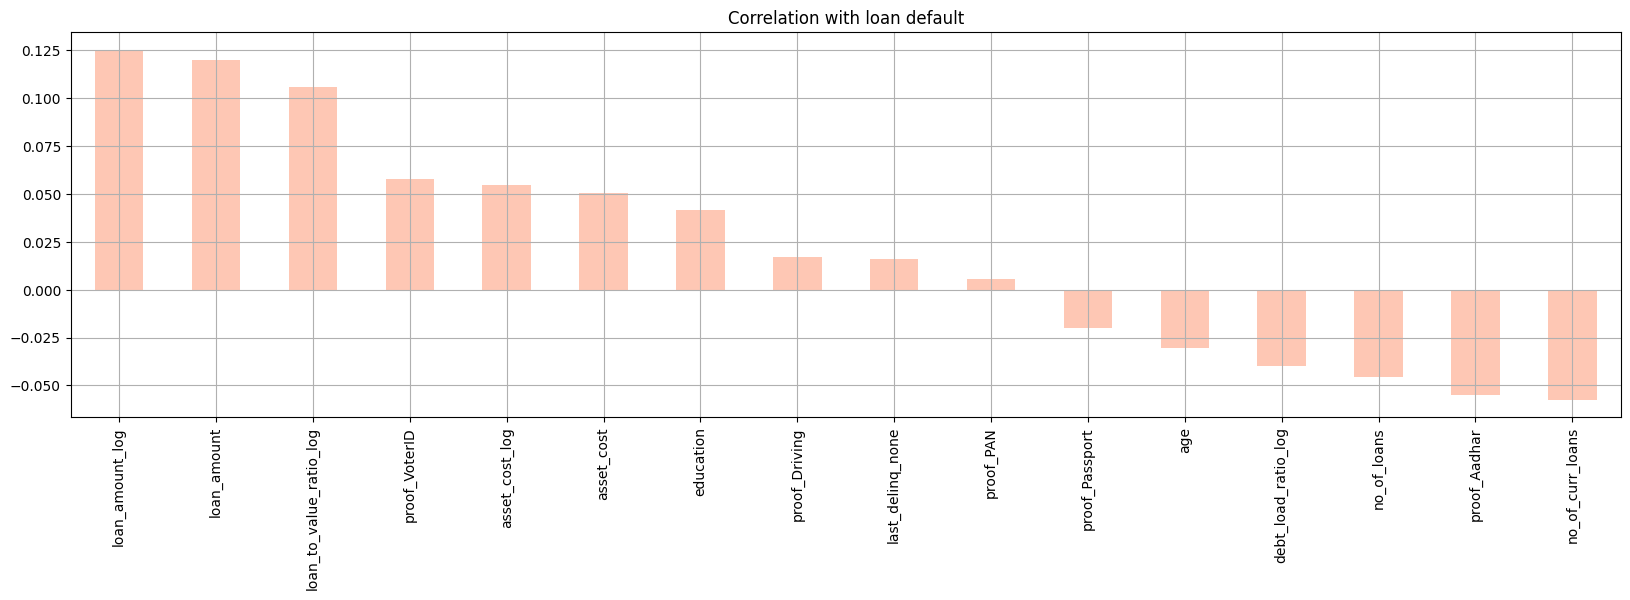

In [30]:
# show other features correlation to the target (loan default)
numeric_data = df.select_dtypes(include=['float64', 'int64', 'int32'])

correlations = numeric_data.drop('loan_default', axis=1).corrwith(numeric_data['loan_default'])
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations.plot(kind='bar', grid=True, figsize=(20, 5), title="Correlation with loan default", color='#FEC7B4')
plt.show()

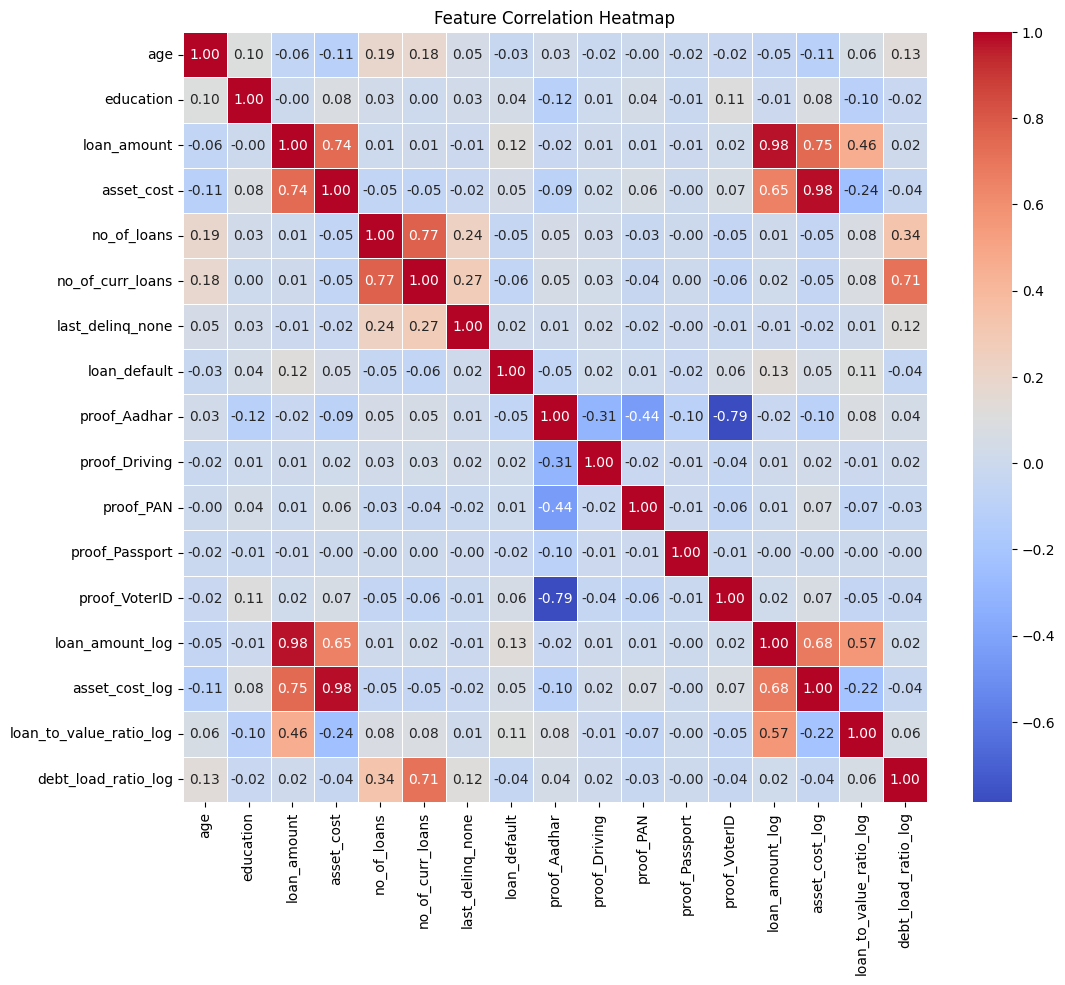

In [31]:
# show heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

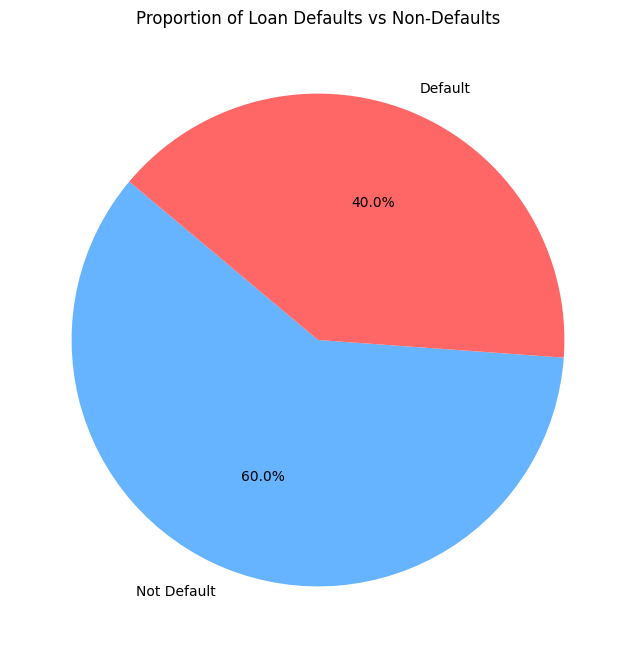

In [32]:
# count the number of defaults and non-defaults
loan_default_counts = df['loan_default'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(loan_default_counts, labels=['Not Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Proportion of Loan Defaults vs Non-Defaults')
plt.show()

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\2825958475.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rate = df.groupby('age_group')['loan_default'].mean()
C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\2825958475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_default_rate.index, y=age_default_rate.values, palette='viridis')


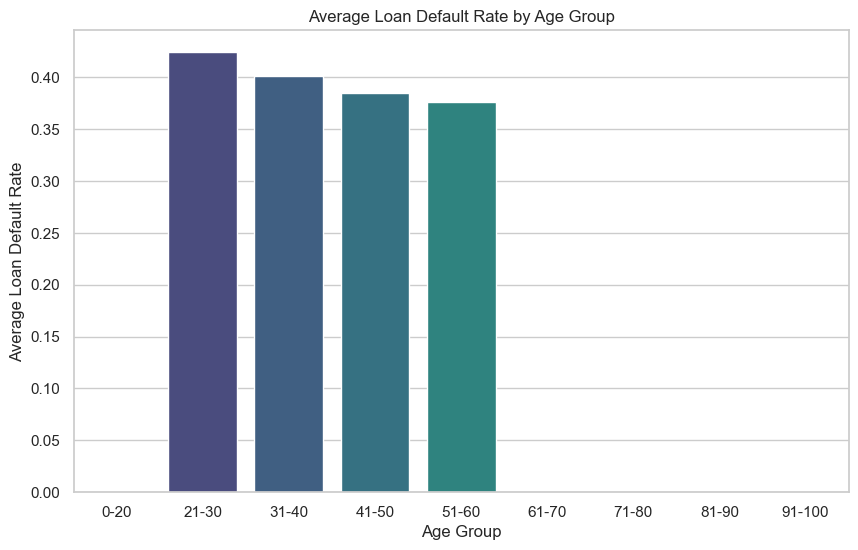

In [33]:
# relationship between age and loan default
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_default_rate = df.groupby('age_group')['loan_default'].mean()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=age_default_rate.index, y=age_default_rate.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Average Loan Default Rate')
plt.title('Average Loan Default Rate by Age Group')
plt.show()

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\1476152145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eduNotClean['education'].fillna(0, inplace=True)
C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\1476152145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='education', y='loan_default', palette='magma')


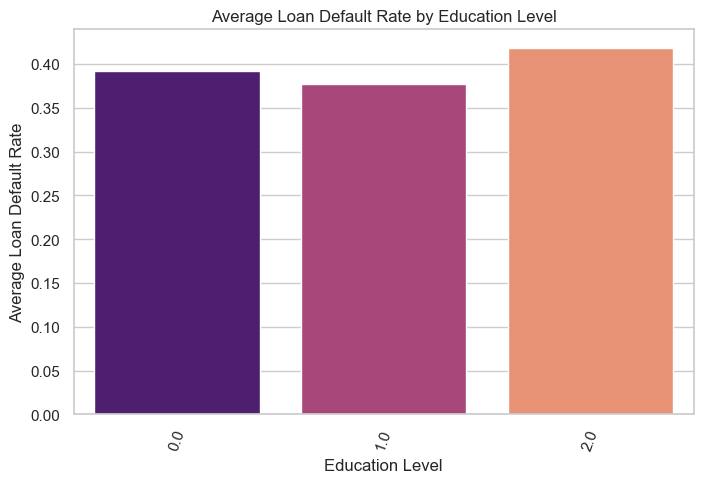

In [34]:
# group by education and calculate the mean of loan_default using (df)
df_eduNotClean['education'].fillna(0, inplace=True)
temp_df = df_eduNotClean.groupby(by='education')['loan_default'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=temp_df, x='education', y='loan_default', palette='magma')
plt.xticks(rotation=70)
plt.xlabel('Education Level')
plt.ylabel('Average Loan Default Rate')
plt.title('Average Loan Default Rate by Education Level')
plt.show()


C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\2171733494.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df2 = df.groupby('loan_amount_cat')['loan_default'].mean().reset_index()
C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\2171733494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df2, x='loan_default', y='loan_amount_cat', palette='coolwarm')


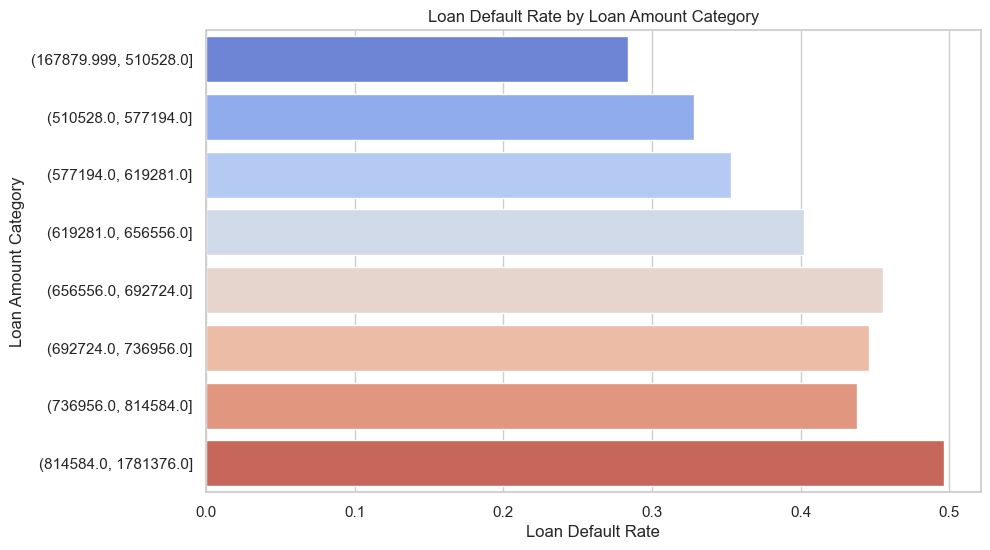

In [35]:
# bin the loan amounts into categories
df['loan_amount_cat'] = pd.qcut(df['loan_amount'], 8)

# group by the loan amount category and calculate the mean loan default rate
temp_df2 = df.groupby('loan_amount_cat')['loan_default'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df2, x='loan_default', y='loan_amount_cat', palette='coolwarm')
plt.xlabel('Loan Default Rate')
plt.ylabel('Loan Amount Category')
plt.title('Loan Default Rate by Loan Amount Category')
plt.show()


C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\959206192.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df3 = df.groupby('asset_cost_cat')['loan_default'].mean().reset_index()
C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\959206192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df3, x='loan_default', y='asset_cost_cat', palette='coolwarm')


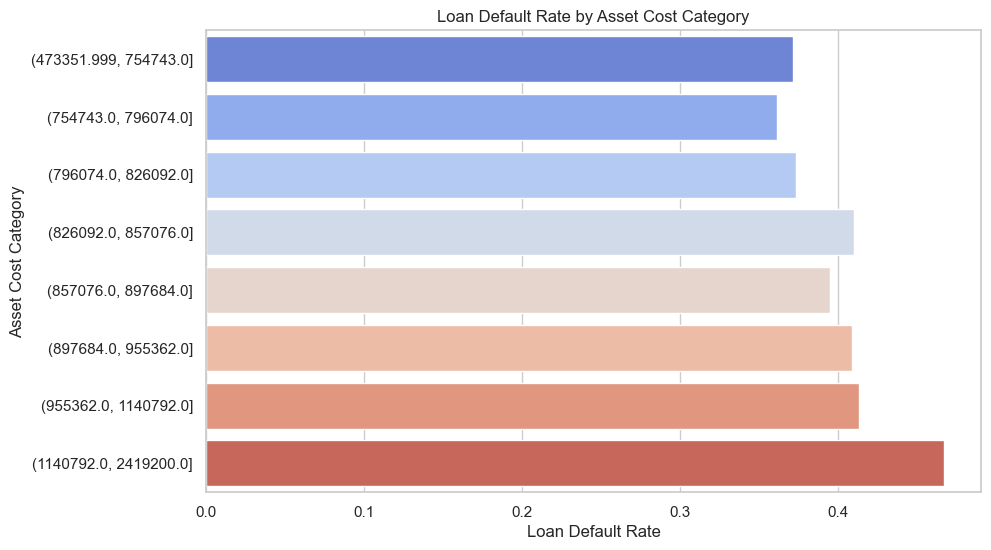

In [36]:
# bin the asset costs into categories
df['asset_cost_cat'] = pd.qcut(df['asset_cost'], 8)

# group by the asset cost category and calculate the mean loan default rate
temp_df3 = df.groupby('asset_cost_cat')['loan_default'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df3, x='loan_default', y='asset_cost_cat', palette='coolwarm')
plt.xlabel('Loan Default Rate')
plt.ylabel('Asset Cost Category')
plt.title('Loan Default Rate by Asset Cost Category')
plt.show()


C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\1009221756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df4, x='last_delinq_none', y='loan_default', palette='magma')


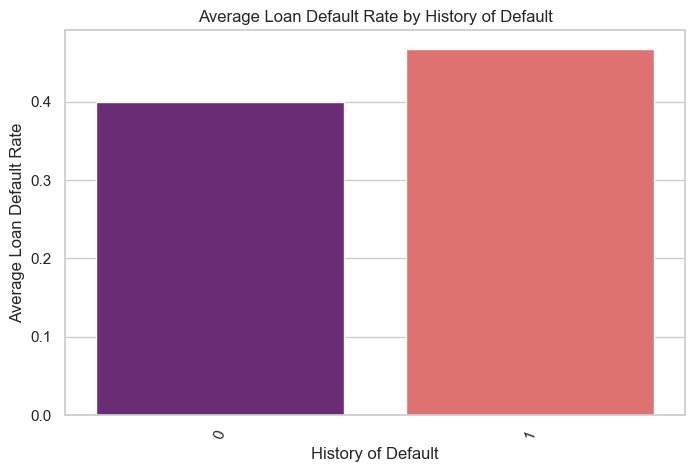

In [37]:
# group by last_delinq_none and calculate the mean of loan_default
temp_df4 = df.groupby(by='last_delinq_none')['loan_default'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=temp_df4, x='last_delinq_none', y='loan_default', palette='magma')
plt.xticks(rotation=70)
plt.xlabel('History of Default')
plt.ylabel('Average Loan Default Rate')
plt.title('Average Loan Default Rate by History of Default')
plt.show()

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_15264\3790338916.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='proof_submitted', y='loan_default', palette='magma', data=mean_default_df)


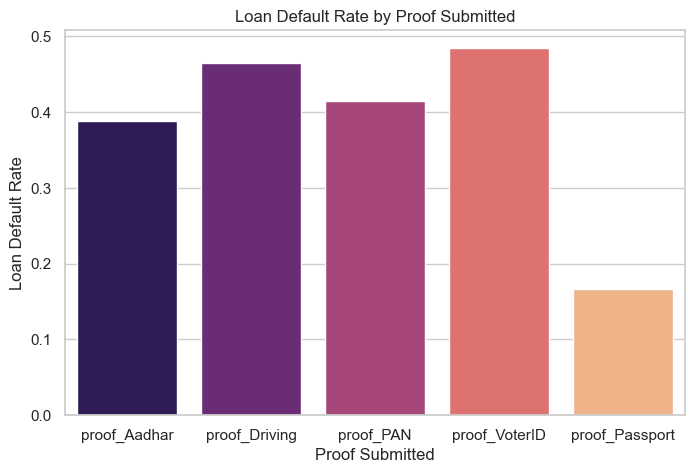

In [38]:
# Calculate the mean loan_default rate for each proof type
proof_columns = ['proof_Aadhar', 'proof_Driving', 'proof_PAN', 'proof_VoterID', 'proof_Passport']
mean_default_rates = {}

for proof in proof_columns:
    # Calculate the mean of loan_default for each proof type
    mean_default_rates[proof] = df[df[proof] == 1]['loan_default'].mean()

# Convert to a DataFrame for easier plotting
mean_default_df = pd.DataFrame(list(mean_default_rates.items()), columns=['proof_submitted', 'loan_default'])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='proof_submitted', y='loan_default', palette='magma', data=mean_default_df)
plt.xlabel('Proof Submitted')
plt.ylabel('Loan Default Rate')
plt.title('Loan Default Rate by Proof Submitted')
plt.show()